<a href="https://colab.research.google.com/github/aghogwarts/E-yantra/blob/main/Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

In [ ]:


# Set the path to your dataset
base_dir = 'D:\E yantra\Task2_dataset'

train_dir = os.path.join(base_dir, 'training')

# Use data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of the data will be used for validation
)

# Create a generator that reads images from the disk
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(90, 90),
    batch_size=16,
    class_mode='categorical',
    subset='training'  # Specify that this is the training set
)

# Create a generator that reads images from the same directory but is used for validation
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(90, 90),
    batch_size=16,
    class_mode='categorical',
    subset='validation'  # Specify that this is the validation set
)



Found 2310 images belonging to 5 classes.
Found 574 images belonging to 5 classes.


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(90, 90, 3))

# Freeze convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Create a new model on top
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

# Compile the model
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0003),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/5


In [ ]:
model.save('D://E yantra//vgg16_custom_80.keras')

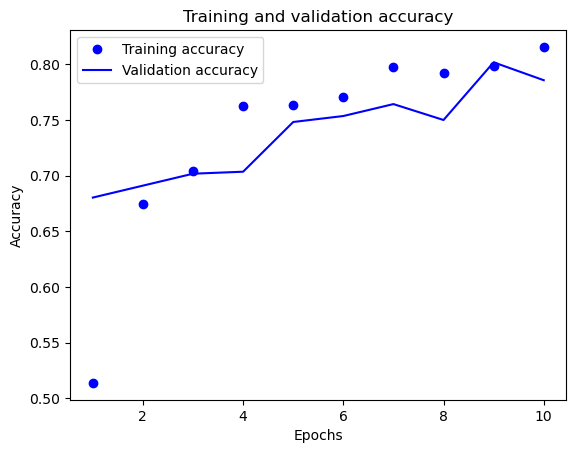

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the saved model
model = load_model('vgg16_custom_80.keras')

# Specify the path to the folder containing test images
test_folder = 'Testing data//testing'

# Define a mapping between class indices and class names
class_mapping = {
    0: 'combat',
    1: 'destroyedbuilding',
    2: 'fire',
    3: 'humanitarianaid',
    4: 'militaryvehicles'
}

# Get a list of all image files in the test folder
test_files = [f for f in os.listdir(test_folder) if os.path.isfile(os.path.join(test_folder, f))]

# Loop through each test image
for file in test_files:
    # Load and preprocess the image
    img_path = os.path.join(test_folder, file)
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make predictions
    predictions = model.predict(img_array)

    # Get the predicted class index
    predicted_class_index = np.argmax(predictions)

    # Map the class index to class name using the class_mapping
    predicted_class_name = class_mapping[predicted_class_index]

    print(f"Image: {file}, Predicted class: {predicted_class_name}")


OSError: ignored